In [1]:
import imageio.v2 as imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Выделение контуров с использованием свертки и СКО

In [82]:
im = imageio.imread('1920px-ТЭЦ-27.jpg')

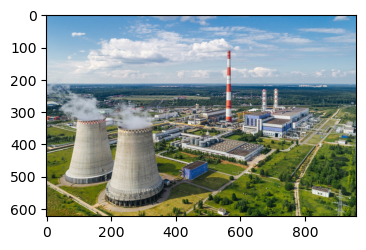

In [73]:
plt.figure(figsize=(4,4))
plt.imshow(im)
plt.show()

In [79]:
def weigth(w,h,n):
    if n==0:
        #низкочастотная фильтрация
        z = np.ones( (w,h), dtype = np.float32 )
        return (z/np.sum(z))
    
    if n==1:
        #Собел dY
        z = np.zeros( (w,h), dtype = np.float32 )
        z[0,:] = [-1,-2, -1]
        z[2,:] = [1, 2, 1]
        
    if n==2:
        #Собел dX
        z = np.zeros( (w,h), dtype = np.float32 )
        z[:,0] = [-1, -2, -1]
        z[:,2] = [1, 2, 1]
        
    return z

def func_sum(x):
    return np.sum(x)

def func_std(x):
    return np.std(x)

def im_filter(im, k, func = func_sum):
    result = np.zeros(im.shape)
    for i in range(w, im.shape[0]-w):
        for j in range(h, im.shape[1]-h):
            result[i,j] = func(im[i:i+w, j:j+h]*k)
    return result

In [75]:
def im_show(row, col, images, titles , figsize=(8,8)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(row, col, i+1)
        plt.subplots_adjust(hspace=0.3)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        

In [80]:
w, h = 3, 3
k = weigth(w, h, 2)
k

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]], dtype=float32)

In [95]:
img = im[:,:,2]
#Cглаживание
k = weigth(w, h, 0)
img = im_filter(img, k)
#Собел
k_y = weigth(w, h, 1)
k_x = weigth(w, h, 2)
im_sobel = np.abs(im_filter(img, k_x)) + np.abs(im_filter(img, k_y))   

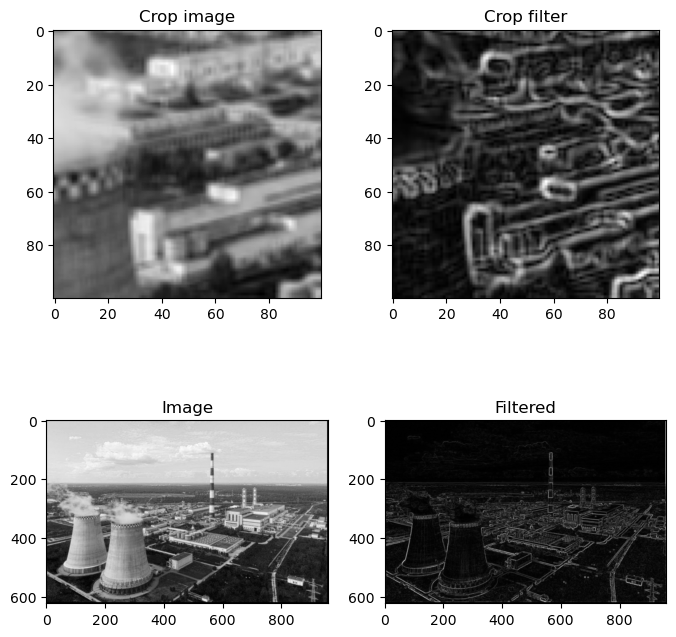

In [96]:
images = [img[300:400,300:400], im_sobel[300:400,300:400], img, im_sobel]
titles = ['Crop image', 'Crop filter', 'Image', 'Filtered' ]
im_show(2, 2, images, titles )


### Определим пороги для бинаризации перепадов яркости

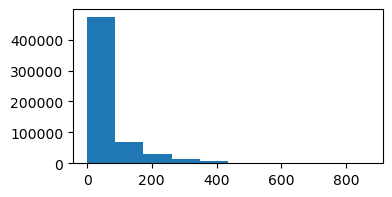

In [97]:
plt.figure(figsize=(4,2))
plt.hist(result.ravel())
plt.show()

In [98]:
threshold = np.quantile(im_sobel.ravel(), 0.95)
threshold

241.11111068725586

In [99]:
im_sobel_bin = im_sobel > threshold


### Выделим граници с использованием СКО

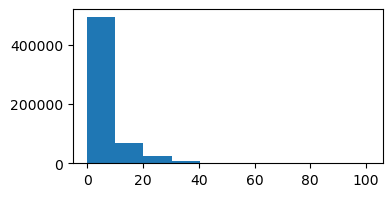

In [100]:
k=1
im_std = im_filter(img, k, func_std)
plt.figure(figsize=(4,2))
plt.hist(im_std.ravel())
plt.show()
threshold = np.quantile(im_std.ravel(), 0.95)
im_std_bin = im_std > threshold 

In [102]:
threshold

20.867260869212924

### Результат

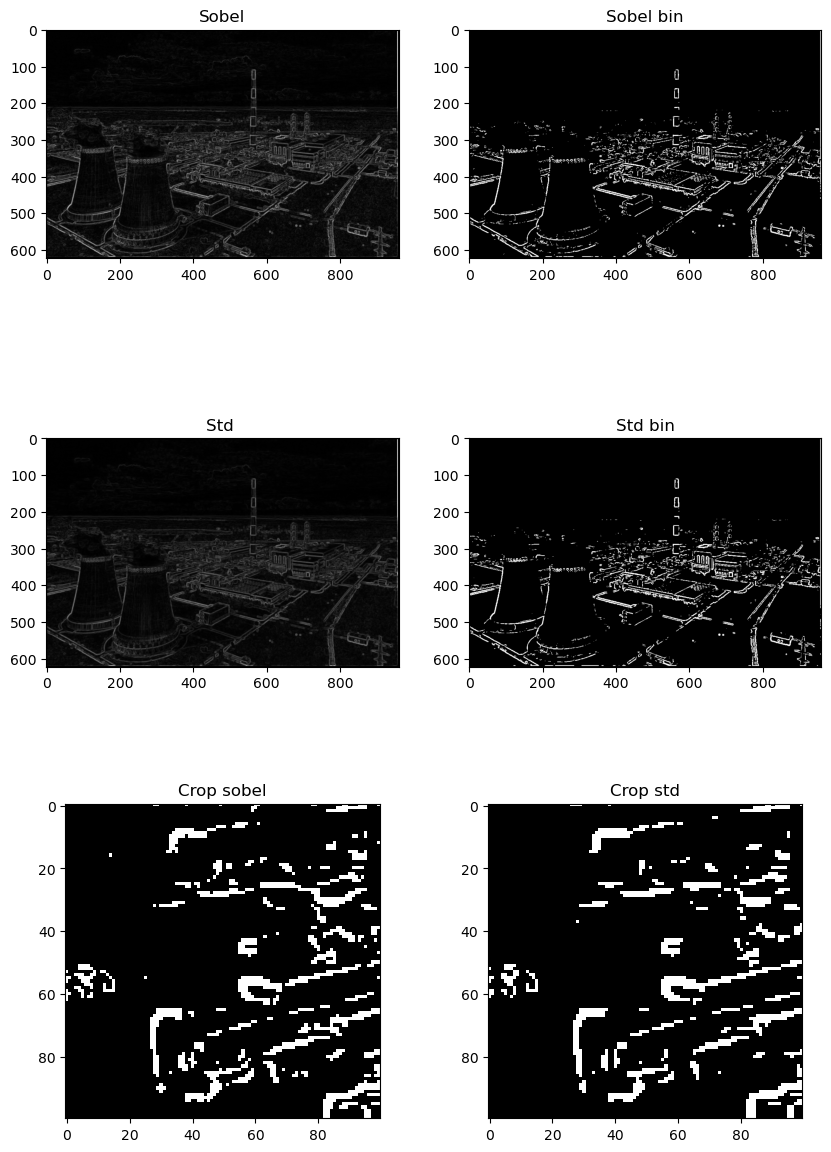

In [104]:
images = [im_sobel, im_sobel_bin , im_std, im_std_bin, im_sobel_bin[300:400,300:400],im_std_bin[300:400,300:400]]
titles = ["Sobel", "Sobel bin", "Std ", "Std bin", "Crop sobel", "Crop std" ]
im_show(4, 2, images, titles, figsize=(10,20) )